# 1. k-means using scikit-learn

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
healthy = pd.read_csv('healthy_lifestyle.csv')

# Input the number of clusters
number = int(input("Enter the number of clusters: "))

# Define input features
X = healthy[['sunshine_hours', 'happiness_levels']]

# Use StandardScaler to standardize input features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['sunshine_hours', 'happiness_levels'])
X = X.dropna()

# Initialize and fit a k-means clustering algorithm
kmeans = KMeans(n_clusters=number, init='random', n_init=10, random_state=123, algorithm='elkan')
kmeans.fit(X)

# Find and print the cluster centroids
centroids = kmeans.cluster_centers_
print("Centroids:", np.round(centroids, 4))

# Find and print the cluster inertia
inertia = kmeans.inertia_
print("Inertia:", np.round(inertia, 4))


Enter the number of clusters: 4
Centroids: [[-0.9471  0.8281]
 [ 0.8294  0.2562]
 [ 1.3106 -1.887 ]
 [-0.6372 -0.7943]]
Inertia: 16.4991


# 2. Hierarchical clustering using scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage

# Silence warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
healthy = pd.read_csv('healthy_lifestyle.csv')

# Input the number of clusters
number = int(input("Enter the number of clusters: "))

# Define input features
X = healthy[['sunshine_hours', 'happiness_levels']]

# Use StandardScaler to standardize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['sunshine_hours', 'happiness_levels'])
X_scaled = X_scaled.dropna()

# Initialize and fit an agglomerative clustering model using scikit-learn with ward linkage
agglomerative_model = AgglomerativeClustering(n_clusters=number, linkage='ward')
X_scaled['labels'] = agglomerative_model.fit_predict(X_scaled)
print(X_scaled.head())

# Perform agglomerative clustering using SciPy

# Calculate the distances between all instances
distances = pdist(X_scaled[['sunshine_hours', 'happiness_levels']])

# Convert the distance matrix to a square matrix
dist_matrix = squareform(distances)

# Define a clustering model with ward linkage
clustersHealthyScipy = linkage(distances, method='ward')

# Print the first five rows of the linkage matrix
print('First five rows of the linkage matrix from SciPy:\n', np.round(clustersHealthyScipy[:5, :], 0))


Enter the number of clusters: 4
   sunshine_hours  happiness_levels  labels
0       -0.691660          1.025642       3
1        0.695725          0.801124       0
2       -0.645295          0.872562       3
3       -0.757641          0.933794       3
4       -1.098246          1.229750       3
First five rows of the linkage matrix from SciPy:
 [[39. 40.  0.  2.]
 [28. 43.  0.  3.]
 [ 7. 18.  0.  2.]
 [ 8. 42.  0.  2.]
 [36. 45.  0.  3.]]


# 3. DBSCAN using scikit-learn

Labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

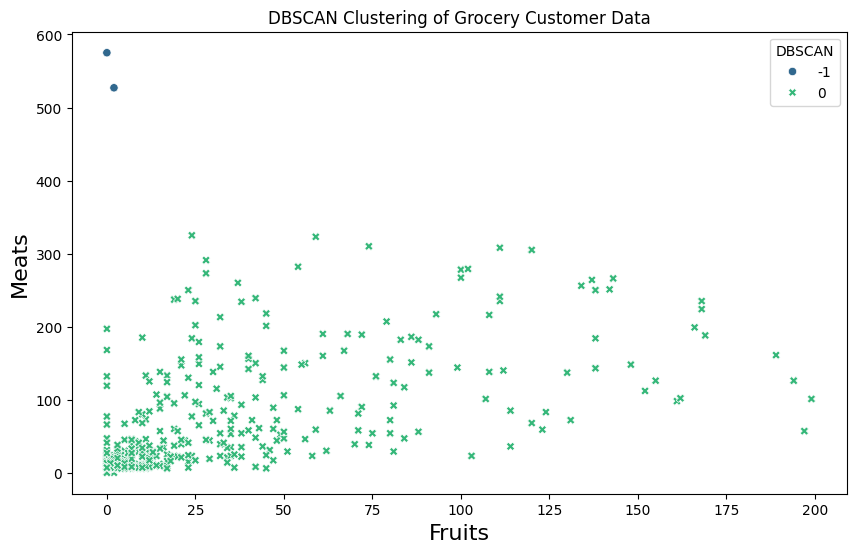

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the full grocery customer dataset and take a random sample of 500 instances
data = pd.read_csv('customer_personality.csv').sample(500, random_state=123)

# Select and standardize input features
X = data[['Fruits', 'Meats']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['Fruits', 'Meats'])

# Apply DBSCAN with epsilon=1 and min_samples=8
dbscan = DBSCAN(eps=1, min_samples=8)
dbscan = dbscan.fit(X)

# Print the cluster labels and core point indices
labels = dbscan.labels_
core_points = dbscan.core_sample_indices_
num_core_points = len(core_points)
num_outliers = sum(labels == -1)

print('Labels:', labels)
print('Core points:', core_points)
print('Number of core points:', num_core_points)
print('Number of outliers:', num_outliers)

# Add the cluster labels to the dataset as strings for visualization
data['clusters'] = labels.astype(str)

# Sort by cluster label (for plotting purposes)
data.sort_values(by='clusters', inplace=True)

# Plot clusters on the original data
plt.figure(figsize=(10, 6))
p = sns.scatterplot(data=data, x='Fruits', y='Meats', hue='clusters', style='clusters', palette='viridis')
p.set_xlabel('Fruits', fontsize=16)
p.set_ylabel('Meats', fontsize=16)
p.legend(title='DBSCAN')
plt.title('DBSCAN Clustering of Grocery Customer Data')
plt.show()
